# Parabilic SAR AF パラメータのスクリーニング・チェック (2)

In [23]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [24]:
import os
import re

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)

from funcs.common import add_data_af

In [25]:
date = '2025-04-28'
dir_path = '../doe/results_Simple_SAR_2'
dir_pic = 'study_202_AF'

## データソース

In [26]:
dict_html = dict()
pattern = re.compile(r'summary.*_([0-9a-z]{4}).*\.html')
df = pd.DataFrame()

for f in sorted(os.listdir(os.path.join(dir_path, date))):
    m = pattern.match(f)
    if m:
        code = m.group(1)
        dict_html[code] = f

for code in dict_html.keys():
    tbl = pd.read_html(os.path.join(dir_path, date, dict_html[code]))
    add_data_af(df, tbl[0], code)
df

,af_init,af_step,af_max,7011,7203,8306
0,0.0,0.00001,0.00010,400,1800,6000
1,0.0,0.00002,0.00020,400,2600,6300
2,0.0,0.00003,0.00030,-1800,2200,7700
3,0.0,0.00005,0.00050,-2200,-2700,7300
4,0.0,0.00007,0.00075,-1700,-3100,9300
5,0.0,0.00010,0.00100,-1900,-1100,5400
6,0.0,0.00020,0.00200,-1200,-5600,8100
7,0.0,0.00030,0.00300,-1000,1000,11000
8,0.0,0.00050,0.00500,-2400,-3700,12200
9,0.0,0.00075,0.00750,-1400,-900,4200


## AF step vs. Profit

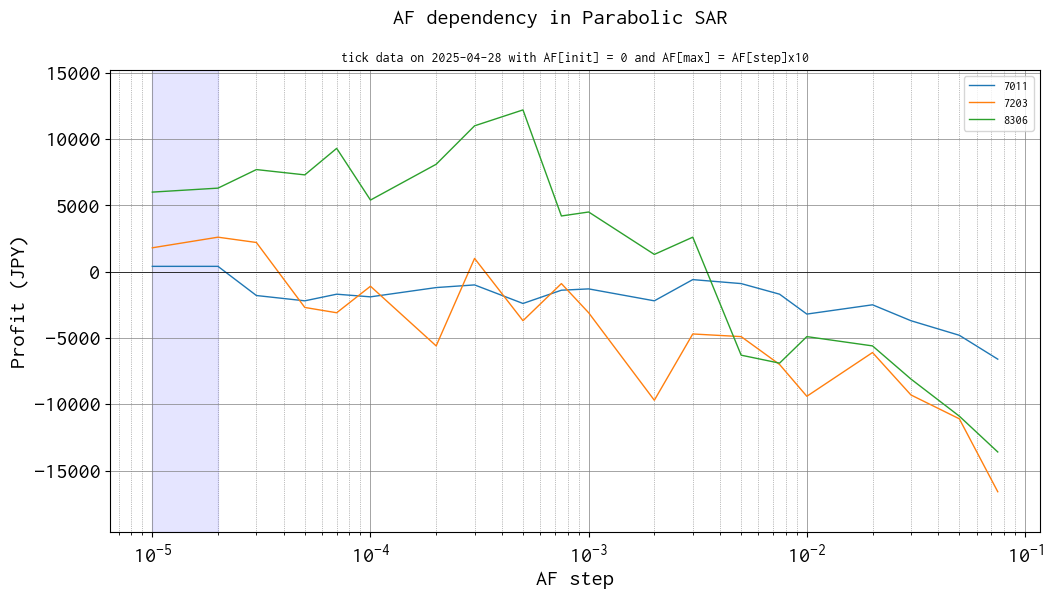

In [27]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

x = df['af_step']
y = dict()
for i, code in enumerate(dict_html.keys()):
    y[i] = df[code]
    ax.plot(x, y[i], label='%s' % code, lw=1)


threshold = 0
ax.fill_between(
    x, 0, 1,
    where=(y[0] > threshold) & (y[1] > threshold) & (y[2] > threshold),
    color='blue',
    alpha=0.1,
    transform=ax.get_xaxis_transform()
)

ax.axhline(0, color='black', lw=0.5)
ax.set_xscale('log')
ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)

ax.set_xlabel('AF step')
ax.set_ylabel('Profit (JPY)')
ax.legend(fontsize=9)

ax.set_title('tick data on %s with AF[init] = 0 and AF[max] = AF[step]x10' % date, fontsize=10)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=16)
plt.savefig('./%s/%s.png' % (dir_pic, date))
plt.show()